### Step 2
### EDA and Attributes Selection 

In [1]:
import os
import time
import subprocess

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/finalprojectdata_filtered_1.7M_3")

23/03/11 00:58:30 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
# total columns in root level
len(df.columns)

41

#### Picking up all necessary columns which will make sense for our analysis

In [6]:
data_dictionary = pd.DataFrame(columns = ['Twitter JSON', 'Local DataFrame'])

In [7]:
data_dictionary.loc[0] = ['id','Tweet_ID' ]
data_dictionary.loc[1] = ['entities.hashtags.text','Parsed_Hashtags' ]
data_dictionary.loc[2] = ['user.id','User_ID' ]
data_dictionary.loc[3] = ['user.screen_name','User_Name' ]
data_dictionary.loc[4] = ['user.location','User_Defined_Location' ]
data_dictionary.loc[5] = ['user.description','User_Description' ]
data_dictionary.loc[6] = ['user.verified','User_Verified' ]
data_dictionary.loc[7] = ['user.followers_count','User_Profile_Followers_Count' ]
data_dictionary.loc[8] = ['user.statuses_count','User_Tweets-Retweet_Count' ]
data_dictionary.loc[8] = ['user.listed_count','User_List_Count' ]
data_dictionary.loc[10] = ['geo.coordinates','Tweet_Location_Lat-Long' ]
data_dictionary.loc[11] = ['retweeted','If_Retweeted_Root' ]
data_dictionary.loc[12] = ['place.country','Place_Country' ]
data_dictionary.loc[13] = ['text','Parsed_Hashtags' ]
data_dictionary.loc[14] = ['text','Text' ]
data_dictionary.loc[15] = ['tweet_text','Tweet_Text' ]
data_dictionary.loc[16] = ['created_at','Tweet_Date' ]
data_dictionary.loc[17] = ['retweeted_status.entities.user_mentions.id','RT_Mentioned_User_ID' ]
data_dictionary.loc[18] = ['retweeted_status.retweet_count','RT_Status_RT_Count' ]
data_dictionary.loc[19] = ['retweeted_status.favorite_count','RT_Status_Like_Count' ]
data_dictionary.loc[20] = ['retweeted_status.reply_count','RT_Status_Reply_Count' ]
data_dictionary.loc[21] = ['retweeted_status.quote_count','RT_Stats_Quoted_Count' ]
data_dictionary.loc[22] = ['retweeted_status.user.id','RT_Status_Original_User_ID' ]
data_dictionary.loc[23] = ['retweeted_status.user.screen_name','RT_Status_Original_User_Screen_Name' ]
data_dictionary.loc[24] = ['tweeretweeted_status.user.locationt_text','RT_Status_Original_User_Location' ]
data_dictionary.loc[25] = ['retweeted_status.user.description','RT_Status_Original_User_Description' ]
data_dictionary.loc[26] = ['retweeted_status.user.verified','RT_Status_Original_User_Verified' ]
data_dictionary.loc[27] = ['retweeted_status.user.followers_coun','RT_Status_Original_User_followers_count' ]
data_dictionary.loc[28] = ['retweeted_status.user.statuses_count','RT_Status_Original_User_statuses_count' ]
data_dictionary.loc[29] = ['retweeted_status.user.listed_count','RT_Status_Original_User_listed_count' ]
data_dictionary.loc[30] = ['retweeted_status.id','RT_Status_Original_Tweet_Id' ]
data_dictionary.loc[31] = ['retweeted_status.text','RT_Status_Original_Tweet_Text' ]







In [8]:
data_dictionary.tail(16)

,Twitter JSON,Local DataFrame
16,created_at,Tweet_Date
17,retweeted_status.entities.user_mentions.id,RT_Mentioned_User_ID
18,retweeted_status.retweet_count,RT_Status_RT_Count
19,retweeted_status.favorite_count,RT_Status_Like_Count
20,retweeted_status.reply_count,RT_Status_Reply_Count
21,retweeted_status.quote_count,RT_Stats_Quoted_Count
22,retweeted_status.user.id,RT_Status_Original_User_ID
23,retweeted_status.user.screen_name,RT_Status_Original_User_Screen_Name
24,tweeretweeted_status.user.locationt_text,RT_Status_Original_User_Location
25,retweeted_status.user.description,RT_Status_Original_User_Description


In [9]:
filtered_df = df.select(col('id').alias('Tweet_ID'),\
                col('retweeted_status.retweet_count').alias('RT_Status_RT_Count')\
               , col('retweeted_status.favorite_count').alias('RT_Status_Like_Count'),\
              col('retweeted_status.reply_count').alias('RT_Status_Reply_Count'),\
               col('retweeted_status.quote_count').alias('RT_Stats_Quoted_Count'),\
               col('retweeted_status.user.id').alias('RT_Status_Original_User_ID'),\
               col('retweeted_status.user.screen_name').alias('RT_Status_Original_User_Screen_Name'),\
               col('retweeted_status.user.location').alias('RT_Status_Original_User_Location'),\
               col('retweeted_status.user.description').alias('RT_Status_Original_User_Description'),\
               col('retweeted_status.user.verified').alias('RT_Status_Original_User_Verified'),\
               col('retweeted_status.user.followers_count').alias('RT_Status_Original_User_followers_count'),\
               col('retweeted_status.user.statuses_count').alias('RT_Status_Original_User_statuses_count'),\
               col('retweeted_status.user.listed_count').alias('RT_Status_Original_User_listed_count'),\
               col('retweeted_status.id').alias('RT_Status_Original_Tweet_Id'),\
               col('retweeted_status.text').alias('RT_Status_Original_Tweet_Text'),\
               col('retweeted_status.created_at').alias('RT_Status_Original_Tweet_Created_at'),\

                        
    
               col('entities.hashtags.text').alias('Parsed_Hashtags'),\
               col('user.id').alias('User_ID'),\
               col('user.screen_name').alias('User_Name'),\
               col('user.location').alias('User_Defined_Location'),\
               col('user.description').alias('User_Description'),\
               col('user.verified').alias('User_Verified'),\
               col('user.followers_count').alias('User_Profile_Followers_Count'),\
               col('user.statuses_count').alias('User_Tweets-Retweet_Count'),\
               col('user.listed_count').alias('User_List_Count'),\
               col('user.created_at').alias('User_ID_Creation_Date'),\
               col('retweeted_status.entities.user_mentions.id').alias('RT_Mentioned_User_ID'),\
               col('geo.coordinates').getItem(0).alias('Tweet_Location_Lat'),\
               col('geo.coordinates').getItem(1).alias('Tweet_Location_Long'),\
               col('retweeted_status.retweeted').alias('If_Retweeted'),\
               col('retweeted').alias('If_Retweeted_Root'),
               col('place.country').alias('Place_Country'),
               col('text').alias('Text'),
               col('tweet_text').alias('Tweet_Text'),
                col('created_at').alias('Tweet_Date')
                             
             )

In [10]:
filtered_df.limit(10)

Tweet_ID,RT_Status_RT_Count,RT_Status_Like_Count,RT_Status_Reply_Count,RT_Stats_Quoted_Count,RT_Status_Original_User_ID,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_Location,RT_Status_Original_User_Description,RT_Status_Original_User_Verified,RT_Status_Original_User_followers_count,RT_Status_Original_User_statuses_count,RT_Status_Original_User_listed_count,RT_Status_Original_Tweet_Id,RT_Status_Original_Tweet_Text,RT_Status_Original_Tweet_Created_at,Parsed_Hashtags,User_ID,User_Name,User_Defined_Location,User_Description,User_Verified,User_Profile_Followers_Count,User_Tweets-Retweet_Count,User_List_Count,User_ID_Creation_Date,RT_Mentioned_User_ID,Tweet_Location_Lat,Tweet_Location_Long,If_Retweeted,If_Retweeted_Root,Place_Country,Text,Tweet_Text,Tweet_Date
1622528582131007489,17,5,0,0,1552709956679475205,Brhanmebrhatu21,null,#StopBombingTigra...,false,567,25349,2,1622472844729786368,"In Tigray, an est...",Mon Feb 06 05:50:...,[],1563134925355618305,yihono1,null,ታይ ከባ በለት ታእኖ💔😭,false,557,12245,0,Fri Aug 26 12:03:...,[],null,null,false,RT,null,RT @Brhanmebrhatu...,"In Tigray, an est...",Mon Feb 06 09:32:...
1622528627827933184,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[AustraliaEducati...,1592353020297330688,h__appiness__,Lagos,null,false,354,7075,0,Tue Nov 15 03:05:...,null,null,null,null,,null,If you want to st...,If you want to st...,Mon Feb 06 09:32:...
1622528698334294016,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[],2279668814,dewisetyorini82,bojonegoro,null,false,12,20737,0,Mon Jan 06 22:28:...,null,null,null,null,,null,Us. Life competit...,Us. Life competit...,Mon Feb 06 09:32:...
1622528706697650176,28,4,0,0,1600183820057288708,TakeleFite,ትግራይ,ምስ ለባም ህዝበይ እየ🔑,false,422,2317,0,1622512166984208387,Children deserve ...,Mon Feb 06 08:27:...,[TigrayGenocide],1563134925355618305,yihono1,null,ታይ ከባ በለት ታእኖ💔😭,false,557,12253,0,Fri Aug 26 12:03:...,[],null,null,false,RT,null,RT @TakeleFite: C...,Children deserve ...,Mon Feb 06 09:32:...
1622528714536878081,27,152,5,5,1412474438117900294,coachrobwood,null,On a Mission to I...,false,9932,5401,55,1622245648107028482,The current homes...,Sun Feb 05 14:47:...,[],1441037541306736640,ThomasS03901268,null,Constitutional Li...,false,3170,32247,1,Thu Sep 23 13:52:...,[],null,null,false,RT,null,RT @coachrobwood:...,The current homes...,Mon Feb 06 09:32:...
1622528748376535042,4,3,0,0,1498166646330245123,HagosSuzan,null,peace🙏🙏🤲🌏💊,false,1283,313596,0,1622525572701388801,Education is the ...,Mon Feb 06 09:20:...,[Tigray],1492956827587428354,anter_gol,"Sigtuna, Sverige",i am here to for ...,false,6224,288405,0,Sun Feb 13 20:20:...,[],null,null,false,RT,null,RT @HagosSuzan: E...,Education is the ...,Mon Feb 06 09:32:...
1622528757197156355,5,2,0,0,1498166646330245123,HagosSuzan,null,peace🙏🙏🤲🌏💊,false,1283,313596,0,1622525408154619904,"In Tigray,an esti...",Mon Feb 06 09:19:...,[],1492956827587428354,anter_gol,"Sigtuna, Sverige",i am here to for ...,false,6224,288406,0,Sun Feb 13 20:20:...,[],null,null,false,RT,null,RT @HagosSuzan: I...,"In Tigray,an esti...",Mon Feb 06 09:32:...
1622528990027165698,4,49,2,2,802474615050215424,Kerry_edu,"Cambridge, MA",Senior fellow @fe...,false,8465,4853,132,1622023375341371392,It's messages I g...,Sun Feb 05 00:04:...,[],20101204,MrsSDalton75,the boro,Believer in freed...,false,527,8834,1,Wed Feb 04 22:20:...,[],null,null,false,RT,null,RT @Kerry_edu: It...,It's messages I g...,Mon Feb 06 09:33:...
1622528999606853634,29,8,0,0,1540401390127927296,ZN9bBU3mqNK6l0k,null,Tigray,false,943,197337,0,1622456648659832832,"In Tigray, an est...",Mon Feb 06 04:46:...,[],1450812611893895169,Hinefeday1,null,null,false,1476,11356,0,Wed Oct 20 13:14:...,[],null,null,false,RT,null,RT @ZN9bBU3mqNK6l...,"In Tigray, an est...",Mon Feb 06 09:33:...
1622529013364178944,13,2,0,0,1606764420545363968,SelamSeyom,null,#StopWarOnTigray ...,false,251,27730,0,1622494835885150209,Children deserve ...,Mon Feb 06 07:

###### We have selected all required columns

##### Checking for data missingness in these columns to further fine tune  API Selection

In [11]:
size_of_filtered_df = filtered_df.count()


In [12]:
size_of_filtered_df

1731801

In [13]:
null_counts = filtered_df.select([count(when(col(c).isNull() | (col(c).cast("string") == ""), c)).alias(c) if c != "Parsed_Hashtags" 
                         else count(when(array_contains(c, "") | col(c).isNull(), c)).alias(c) for c in filtered_df.columns])


In [14]:
%matplotlib inline

In [15]:
pd_null_counts = null_counts.toPandas()

In [16]:
pd_null_counts = pd_null_counts.transpose()

In [17]:
pd_null_counts.set_axis(['Nulls_Count'], axis = 1, inplace = True)
pd_null_counts.Nulls_Count = (pd_null_counts.Nulls_Count / size_of_filtered_df) * 100

In [18]:
pd_null_counts

,Nulls_Count
Tweet_ID,0.000000
RT_Status_RT_Count,9.873536
RT_Status_Like_Count,9.873536
RT_Status_Reply_Count,9.873536
RT_Stats_Quoted_Count,9.873536
RT_Status_Original_User_ID,9.873536
RT_Status_Original_User_Screen_Name,9.873536
RT_Status_Original_User_Location,31.626902
RT_Status_Original_User_Description,14.226057
RT_Status_Original_User_Verified,9.873536


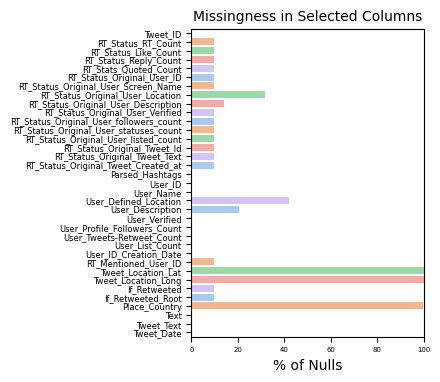

In [19]:
# visualizing nulls
plt.figure(figsize = (3,4))
colors = sns.color_palette('pastel')[0:5]

sns.barplot(y = pd_null_counts.index,x= (pd_null_counts.Nulls_Count), palette = colors)
plt.yticks(rotation=0, fontsize =6)
plt.xticks(rotation=0, fontsize =5)

plt.xlim(0,100)
plt.xlabel("% of Nulls", fontsize = 10)
sns.set(rc={'legend.fontsize': 10})
plt.title('Missingness in Selected Columns', fontsize = 10)

plt.show()

In [20]:
filtered_df.describe()

summary,Tweet_ID,RT_Status_RT_Count,RT_Status_Like_Count,RT_Status_Reply_Count,RT_Stats_Quoted_Count,RT_Status_Original_User_ID,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_Location,RT_Status_Original_User_Description,RT_Status_Original_User_followers_count,RT_Status_Original_User_statuses_count,RT_Status_Original_User_listed_count,RT_Status_Original_Tweet_Id,RT_Status_Original_Tweet_Text,RT_Status_Original_Tweet_Created_at,User_ID,User_Name,User_Defined_Location,User_Description,User_Profile_Followers_Count,User_Tweets-Retweet_Count,User_List_Count,User_ID_Creation_Date,Tweet_Location_Lat,Tweet_Location_Long,If_Retweeted_Root,Place_Country,Text,Tweet_Text,Tweet_Date
count,1731801,1560811,1560811,1560811,1560811,1560811,1560811,1184086,1485434,1560811,1560811,1560811,1560811,1560811,1560811,1731801,1731801,1002653,1377111,1731801,1731801,1731801,1731801,1575,1575,1731801,5516,1731801,1731801,1731801
mean,1.567303054906151...,911.7983663621028,4344.105244645251,151.10263382305737,80.0061371940613,5.668012467940109...,1.01275217E9,3.332418800152614...,7.076548913952506...,1121417.693060851,58638.98879877192,2069.997607013277,1.565048073730326...,null,null,7.638311527436060...,Infinity,Infinity,5.395304622787577E21,6569.583240799607,58883.08058893603,35.27056053207037,null,36.47979968884446,-88.24452807328889,null,null,null,null,null
stddev,3.220630243494162...,3120.731604895915,21439.928427487335,710.9547331232357,426.91129917126375,6.486699890495087...,2.8635829350547223E9,1.896062478125547...,2.791427220815744...,7173767.860189142,121466.224394559,11693.94086720153,4.316248251657192E16,null,null,6.608212899314330...,NaN,NaN,2.334365660356744...,184699.34465649986,128615.9207170188,571.5131131224699,null,9.825530861729803,39.06738653194238,null,null,null,null,null
min,1511197341029580801,1,0,0,0,1183,003CarrierFan,♉︎♉︎♐︎,! Tweets are my p...,0,0,0,2074196342,! @adullamscug we...,Fri Apr 01 00:17:...,324,000000000000hjj,,!,0,1,0,Fri Apr 01 00:08:...,-18.64624514,-159.619083,,,! It room with a ...,! @adullamscug we...,Fri Apr 08 00:00:...
max,1623308295774605312,233417,962357,56955,31545,1622979151455047684,zzzjeffree,🫠,🫶🏿,132086459,3669316,221630,1623306350594781184,🫶A Love for Educ...,Wed Sep 30 16:01:...,1623300891553198083,zzzzsoap,🫶🏾,󠀠 󠀠 󠀠 󠀠 󠀠 󠀠...,52676537,4155994,215322,Wed Sep 30 23:55:...,61.6111726,138.084,RT,日本,🫴 Education expe...,🫶A Love for Educ...,Wed Sep 28 23:59:...


### Saving the dataframe

In [ ]:
%%time
filtered_df.write.mode('overwrite').parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/finalprojectdata_AfterStep2")